In [1]:
import tensorflow as tf
import pickle5
from sklearn.datasets import load_boston
import sklearn.linear_model as sk
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
path = "/home/alexander/Downloads/"

In [3]:
myfile = path+"dataset.pickle"
f = open(myfile, 'rb')
a = pickle5.load(f)
a

,real_rng,rng,rssi,fp_idx,fp_power,fp_amp1,fp_amp2,fp_amp3,std_noise,pacc_cnt,cir_real,cir_imag,condition,location_from,location_to,msid
0,6.269,8.874,-80.101,749,-93.925,287,1596,1881,52,101,"[-25, -35, 1, 64, -11, -146, 34, -49, -174, -1...","[15, 54, 64, -15, 34, 72, 41, -3, -33, -70, -1...",nlos,hw,hw,0
1,6.269,8.045,-80.136,743,-93.968,1404,1657,1179,36,101,"[53, -10, 114, -5, -11, 152, 155, 81, 71, -15,...","[-46, 67, -42, -24, 18, -58, -15, 64, 5, -99, ...",nlos,hw,hw,0
2,6.269,8.006,-80.202,747,-94.004,1467,1683,1035,40,101,"[44, -31, -11, -111, -16, 56, -1, -55, -30, 24...","[-43, -76, -41, -40, -96, 28, -19, 24, 85, 15,...",nlos,hw,hw,0
3,6.269,7.945,-80.082,751,-93.533,1068,1721,1627,40,101,"[-113, -27, 37, -32, 4, -30, 23, 12, 45, -38, ...","[70, 114, -56, -48, 87, 4, 44, 113, 43, -6, 81...",nlos,hw,hw,0
4,6.269,8.047,-80.166,749,-93.624,940,1595,1784,40,101,"[99, -25, -34, -18, 92, -7, -14, -65, -12, 112...","[-134, -1, 66, 23, 67, 97, -38, 11, 19, -37, 7...",nlos,hw,hw,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36696,3.191,3.076,-79.575,744,-81.128,6251,6550,5954,40,101,"[52, -104, -95, -69, -34, 9, 66, -43, -193, -9...","[114, 47, 1, -34, -108, -90, 126, 94, 55, 169,...",los,til,til,748
36697,3.191,3.053,-79.866,749,-81.564,5480,6264,6079,44,101,"[42, -7, -43, 1, 70, 47, 11, 50, -33, -91, 20,...","[53, 142, 28, -76, -128, -42, 132, 50, 64, 104...",los,til,til,748
36698,3.191,3.056,-79.689,748,-81.709,6355,6225,4857,44,101,"[-74, -43, 38, 62, -3, -90, -49, -25, 39, 28, ...","[-103, -214, 34, 79, 123, 34, -101, 14, -106, ...",los,til,til,748
36699,3.191,3.067,-79.859,745,-82.538,6014,6024,3525,48,101,"[55, 120, 63, -69, -52, -74, -107, 60, 147, -1...","[-80, -58, 32, 128, 55, -5, -2, -23, 49, 131, ...",los,til,til,748


In [4]:
target = a.pop('condition')
cir_real = a.pop('cir_real')
cir_imag = a.pop('cir_imag')

In [5]:
X = np.empty(shape=[36701, 1015])


In [6]:
for i in range(0,36701):
    cir_r = np.power(cir_real[i],2)
    cir_i = np.power(cir_imag[i],2)
    final = np.sqrt(cir_r + cir_i)
    final = final.reshape(-1,1015)
    X[i] =  final
X

array([[ 29.15475947,  64.35060217,  64.00781202, ...,  98.48857802,
        106.52699188, 106.25441167],
       [ 70.17834424,  67.74215822, 121.49074039, ...,  40.70626487,
         69.28924881,  65.2533524 ],
       [ 61.52235366,  82.07923002,  42.44997055, ...,  93.94147114,
        115.88356225,  60.16643583],
       ...,
       [126.82665335, 218.27734651,  50.99019514, ..., 118.69709348,
        191.36614121, 158.80806025],
       [ 97.08243919, 133.28165665,  70.66116331, ..., 124.5351356 ,
         81.61494961, 177.5894141 ],
       [238.41140912, 210.44001521,  99.2975327 , ...,  76.85050423,
         63.0634601 ,  59.07622195]])

In [63]:
feat_crop = np.empty(shape=[36701, 300])
norm = np.empty(shape=[36701, 300])
normalized_data = np.empty(shape=[36701, 130])
for i in range(0,36701):
    feat_crop[i] = X[i][650:950] 
    mean = np.mean(feat_crop[i])
    std = np.std(feat_crop[i])
    norm[i] = (feat_crop[i]-mean)/std
pca = PCA(n_components=130)
reduced_data = pca.fit_transform(norm)
for i in range(0,36701):
    mean = np.mean(reduced_data[i])
    std = np.std(reduced_data[i])
    normalized_data[i] = (reduced_data[i]-mean)/std
    
print(normalized_data[2])    


[-3.41267874e+00 -5.33576013e+00 -6.92723304e-01  3.29807490e+00
 -1.90317321e+00 -2.42826309e+00 -2.00343489e+00  3.97854239e+00
 -3.40585054e+00  8.11852086e-01 -1.39095822e+00 -3.49698553e-01
 -1.73097469e-01 -9.56388572e-01  1.77432051e+00 -3.38061890e-01
  2.03695737e-01  1.13508546e+00 -1.20454453e+00  2.86279660e-01
 -1.17193480e+00 -3.36817661e-01 -2.11630351e+00  2.03418429e+00
  6.13257961e-01  2.01992290e-01  1.30297552e+00  8.00904208e-01
 -1.74925566e-01  1.75023325e+00  1.28341167e+00  6.90854563e-02
 -5.51080721e-01 -5.30804152e-01  7.41194006e-02 -4.59878537e-01
 -2.48526508e-01 -5.95977288e-01  2.95443906e-01  3.72919907e-01
  2.14267814e-01 -4.97397788e-01 -7.13729065e-01  3.79219559e-01
 -3.59219685e-01  5.36128864e-01  3.72997096e-03 -2.98595800e-01
  7.66891795e-02 -8.22930366e-01  3.91366594e-01  3.94553305e-01
  5.65863337e-02 -2.55079047e-01  2.88632767e-02  7.00145873e-01
 -2.09434823e-01  3.38899749e-01  5.21911090e-02  6.50801792e-02
 -6.07537525e-03  7.00394

In [64]:
target_bin = [0]*36701
for i in range(0,36701):
    if target[i] == 'nlos':
        target_bin[i] = 1
    else:
        target_bin[i] = 0

In [65]:
np.random.seed(41)
rnd = np.random.rand(len(normalized_data)) < 0.6
print(rnd)

[ True  True False ...  True False  True]


In [66]:
train_x = normalized_data[rnd]
tt = np.array(target_bin)
train_y = tt[rnd]
dev_x = normalized_data[~rnd]
dev_y = tt[~rnd]
train_x.shape

(22195, 130)

In [67]:
xrn = np.random.rand(len(dev_x)) < 0.5

In [68]:
val_x = dev_x[xrn]
test_x = dev_x[~xrn]
val_y = dev_y[xrn]
test_y = dev_y[~xrn]

In [109]:
import tensorflow as tf

# Define the F1 score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision_result = self.precision.result()
        recall_result = self.recall.result()
        return 2 * ((precision_result * recall_result) / (precision_result + recall_result + tf.keras.backend.epsilon()))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)



In [70]:
def convert_to_int(chars):
    low_byte = int(chars[:2], 16)
    high_byte = int(chars[2:], 16)
    # Perform sign extension if the high byte is negative
    if high_byte & 0x80:
        high_byte -= 0x100
    # Combine the bytes and return the result
    return (high_byte << 8) | low_byte

In [71]:
cir_los = np.load('184cirloswithdb.npy')
cir_wlos = np.load('184cirwloswithdb.npy')
cir_nlos = np.load('232cirloswithdbnlos.npy')
cir_nnlos = np.load('nlossecondcir.npy')

In [72]:
testlos = cir_los[100:850]
testnlos = cir_nlos[5:505]
testwlos = cir_wlos[100:850]
testnnlos = cir_nnlos[305:1305]
test_real = np.append(testlos,testwlos,axis=0)
test_real = np.append(test_real,testnlos,axis=0)
test_real = np.append(test_real,testnnlos,axis=0)
print(test_real.shape)

(3000,)


In [73]:
label_los = np.array([0]*1500)
label_nlos = np.array([1]*1500)
label = np.append(label_los,label_nlos,axis=0)
print(label.shape)


(3000,)


In [77]:
import math
import statistics
def make_pred(FL):
    i=0
    sJ = [0]*300
    cirR = [0]*300
    cirI = [0]*300
    for j in range(0,300):     
        cirR[j] =  convert_to_int(FL[i:i+4])
        cirI[j] =  convert_to_int(FL[i+4:i+8])
        sJ[j]=j
        i = i+8 
    final = [0]*300
    for i in range(len(cirI)):
        cirI[i] *= cirI[i]
        cirR[i] *= cirR[i]
        final[i] = math.sqrt(cirR[i]+cirI[i])
    
    # Calculate the mean of the list
    
    mean = np.mean(final)
    std = np.std(final)
    final = (final-mean)/std
    
    final_pca = pca.transform(np.array(final).reshape(1,-1))
    mean = np.mean(final_pca)
    

    # Calculate the standard deviation of the list
    std_dev = np.std(final_pca)

    final_pca = (final_pca - mean)/std_dev        
    zero = np.array(final_pca)
    return zero 

In [78]:
empty = np.empty(( 3000, 130))
for i in range(0,3000):
    empty[i] = make_pred(test_real[i])
print(empty.shape)    

(3000, 130)


In [124]:
modelpcfinal = tf.keras.Sequential([
  layers.Dense(64, activation='relu', input_shape=(130,)),
  layers.Dropout(0.5),  
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.5),  
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.5),  
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(32, activation='relu'),
  layers.Dropout(0.5),  
  layers.Dense(1, activation='sigmoid')
])

# Compile your model
# Compile your model with the F1 score metric
modelpcfinal.compile(optimizer=optimizer,
               loss='binary_crossentropy',
               metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), F1Score()])
historypcfinal = modelpcfinal.fit(train_x, train_y, epochs=30 ,batch_size=10, validation_data=(test_x, test_y))

Epoch 1/30
2220/2220 [==============================] - 6s 2ms/step - loss: 0.6498 - accuracy: 0.6523 - precision_18: 0.3484 - recall_18: 0.0245 - f1_score: 0.0457 - val_loss: 0.6363 - val_accuracy: 0.6749 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 2/30
2220/2220 [==============================] - 4s 2ms/step - loss: 0.6128 - accuracy: 0.6593 - precision_18: 0.2727 - recall_18: 3.9698e-04 - f1_score: 7.9281e-04 - val_loss: 0.6261 - val_accuracy: 0.6749 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 3/30
2220/2220 [==============================] - 4s 2ms/step - loss: 0.5745 - accuracy: 0.6595 - precision_18: 0.0000e+00 - recall_18: 0.0000e+00 - f1_score: 0.0000e+00 - val_loss: 0.5787 - val_accuracy: 0.6749 - val_precision_18: 0.0000e+00 - val_recall_18: 0.0000e+00 - val_f1_score: 0.0000e+00
Epoch 4/30
2220/2220 [==============================] - 4s 2ms/step - loss: 0.5418 - accuracy: 0.7520 - 

Epoch 30/30
2220/2220 [==============================] - 4s 2ms/step - loss: 0.3057 - accuracy: 0.8753 - precision_18: 0.7794 - recall_18: 0.8838 - f1_score: 0.8284 - val_loss: 0.2880 - val_accuracy: 0.8793 - val_precision_18: 0.7446 - val_recall_18: 0.9570 - val_f1_score: 0.8376


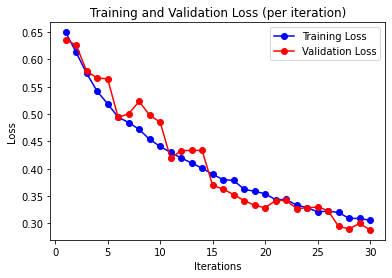

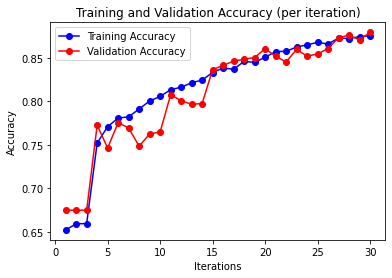

In [125]:
train_loss = historypcfinal.history['loss']
val_loss = historypcfinal.history['val_loss']
train_accuracy = historypcfinal.history['accuracy']
val_accuracy = historypcfinal.history['val_accuracy']

# Get the number of iterations
num_iterations = len(train_loss)

# Create a list of iterations
iterations = range(1, num_iterations + 1)

# Plot the training and validation loss
plt.plot(iterations, train_loss, 'bo-', label='Training Loss')
plt.plot(iterations, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (per iteration)')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(iterations, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(iterations, val_accuracy, 'ro-', label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (per iteration)')
plt.legend()
plt.show()

In [126]:
ff = modelpcfinal.evaluate(empty,label)

94/94 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8877 - precision_18: 0.9663 - recall_18: 0.8033 - f1_score: 0.8773      


In [127]:
modelpcfinal.save(path+"pcfinal")
np.save('historypcfinal.npy',historypcfinal.history)

INFO:tensorflow:Assets written to: /home/alexander/Downloads/pcfinal/assets


In [128]:
dd = modelpcfinal.evaluate(val_x,val_y)

228/228 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.8852 - precision_18: 0.7597 - recall_18: 0.9619 - f1_score: 0.8489
